# Example (Principle Component Analysis)

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.DataFrame()
df['inches'] = [60,66,68,72,76]
df['cm'] = np.round(2.54*df.inches)
df.head(3)

,inches,cm
0,60,152.0
1,66,168.0
2,68,173.0


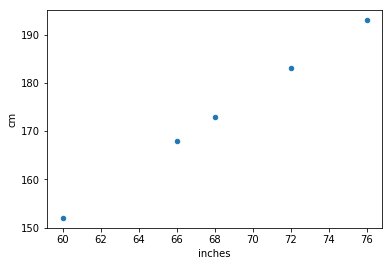

In [4]:
df.plot.scatter(x='inches',y='cm')

In [5]:
df = (df - df.mean())/df.std()

## PVE (Proportion of Variance Explained)

In [9]:
n_comp = df.shape[1]

In [10]:
col = ['PC'+str(1+i) for i in range(n_comp)]
col

['PC1', 'PC2']

In [12]:
pca = PCA(n_components=n_comp)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
PVE = pd.Series(pca.explained_variance_ratio_,index=col)

In [15]:
print(PVE)

PC1    0.999917
PC2    0.000083
dtype: float64


99% of the data set is explained by the first principle component. What is the other <1%? This is a result of the rounding

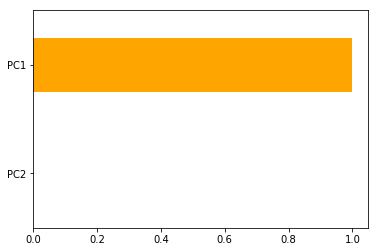

In [16]:
PVE.sort_values().plot.barh(color='orange')

In [17]:
df_loadings = pd.DataFrame(pca.components_,columns= df.columns, index=col)
print(df_loadings.shape)
df_loadings

(2, 2)


,inches,cm
PC1,-0.707107,-0.707107
PC2,-0.707107,0.707107


In [20]:
df_scores = pd.DataFrame(pca.transform(df),columns=col)
df_scores

,PC1,PC2
0,1.972711,-0.014451
1,0.544099,0.015404
2,0.083087,0.010164
3,-0.838937,-0.000318
4,-1.760960,-0.010799
